In [1]:
from tensorflow.keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

train_data=train_data/255.0
test_data=test_data/255.0

In [2]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


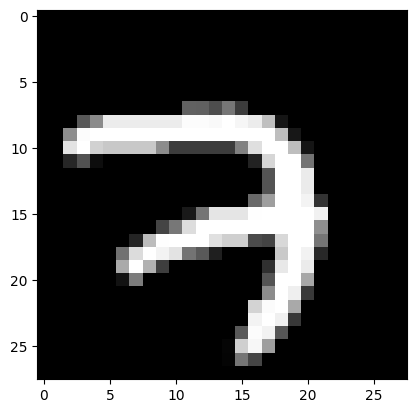

In [3]:
from matplotlib import pyplot as plt

plt.imshow(train_data[5000],cmap='gray')

In [4]:
print(train_target[5000])

7


In [5]:
import numpy as np

noise=np.random.normal(loc=0,scale=1,size=train_data.shape)
print(noise.shape)

(60000, 28, 28)


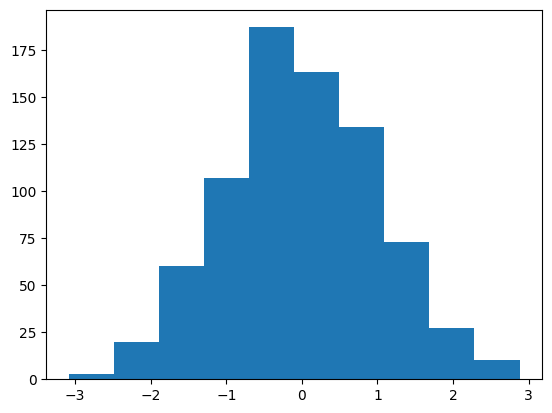

In [6]:
plt.hist(noise[0].flatten(),bins=10)
plt.show()

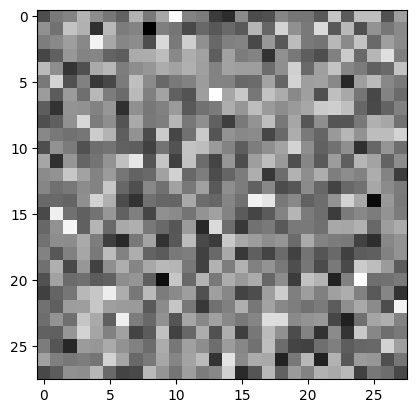

In [7]:
plt.imshow(noise[0],cmap='gray')

In [8]:
print(noise[0])

[[-1.27442839e+00 -2.50651793e-01 -1.18436091e-02  1.08996980e+00
   2.08695375e-01 -3.19770556e-01 -7.92012313e-01  1.07288599e+00
  -2.38205961e-01  7.93734832e-01  2.79488128e+00 -2.55360429e-02
  -2.01561439e-01 -1.65207814e+00 -2.02462438e+00  1.31019886e-01
  -1.33722858e+00 -1.20046166e+00  4.14379003e-02 -3.20349904e-01
  -3.52956503e-01 -9.79864876e-01  1.52388036e+00 -9.64400818e-01
   1.34348262e+00  1.36450980e+00 -1.17191121e+00  6.27827068e-01]
 [ 2.96985680e-01 -4.10081835e-01  1.50505022e+00  1.04059767e+00
  -1.96593660e+00  1.21011889e+00 -1.77192978e-01 -3.04699366e-02
  -3.08685844e+00 -1.03556946e-01 -3.36960908e-01 -1.36478357e+00
  -6.44648383e-01 -1.01423779e+00 -6.36059192e-01 -9.71179226e-01
   1.14950590e+00 -7.01054741e-01  1.87708385e+00  2.91837683e-01
  -2.24077705e-01  1.99644203e+00 -1.03262849e+00  1.21872462e+00
  -1.23528205e+00  3.58065274e-01 -3.34487994e-01  1.17574517e-01]
 [-1.51190478e-01  1.08240993e-01  6.18096253e-01  9.07992657e-02
   2.555

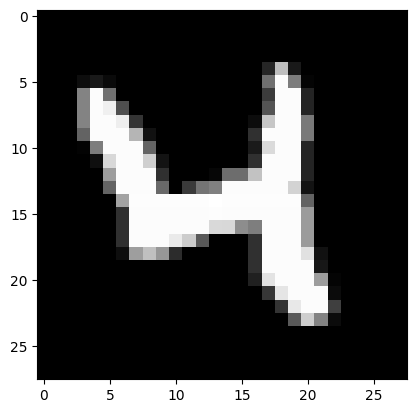

In [9]:
plt.imshow(train_data[20],cmap='gray')

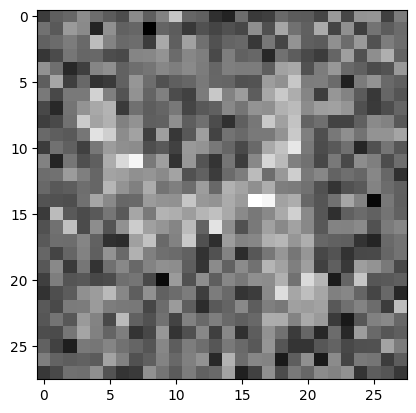

In [10]:
noisy_img=train_data[20]+0.5*noise[0]
plt.imshow(noisy_img,cmap='gray')

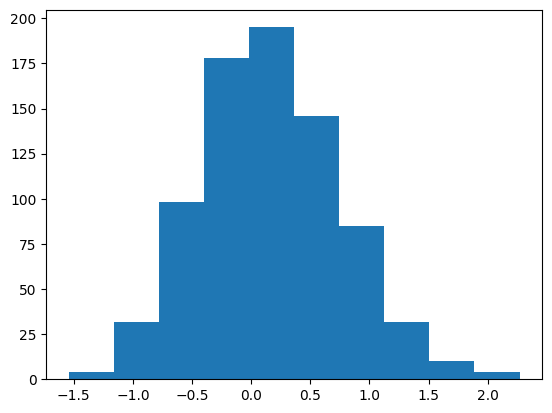

In [11]:
plt.hist(noisy_img.flatten(),bins=10)
plt.show()

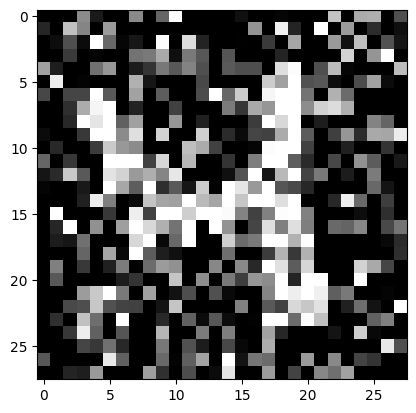

In [12]:
noisy_clip=np.clip(noisy_img,0,1)
plt.imshow(noisy_clip,cmap='gray')

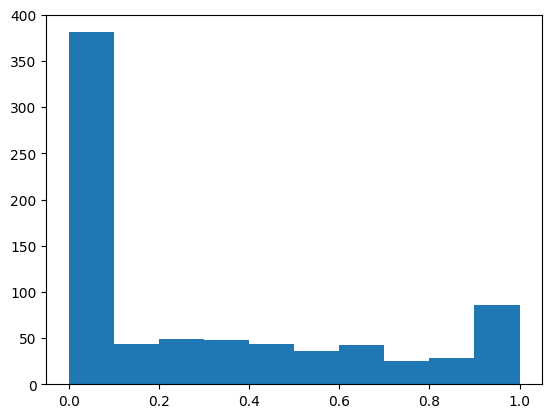

In [13]:
plt.hist(noisy_clip.flatten(),bins=10)
plt.show()

In [14]:
import numpy as np

train_data=train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
test_data=test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

In [15]:
train_data_noisy=train_data+0.5*np.random.normal(loc=0,scale=1,size=train_data.shape)
test_data_noisy=test_data+0.5*np.random.normal(loc=0,scale=1,size=test_data.shape)

#adding random noise to the digits from gaussian distribution

train_data_noisy=np.clip(train_data_noisy,0,1)
test_data_noisy=np.clip(test_data_noisy,0,1)

#clipping the pixels values greater than 1 and less than 0

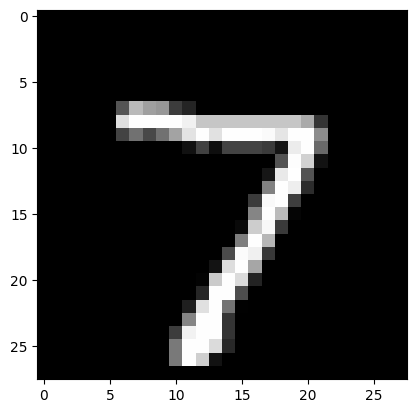

In [16]:
from matplotlib import pyplot as plt

plt.imshow(test_data[0].reshape(28,28),cmap='gray')

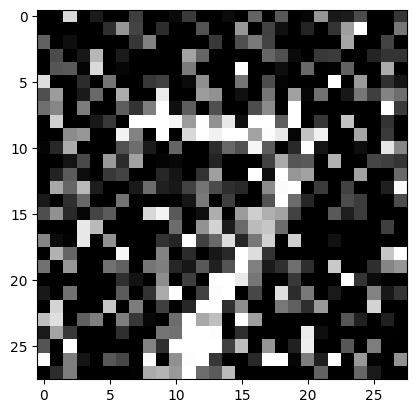

In [17]:
plt.imshow(test_data_noisy[0].reshape(28,28),cmap='gray')

In [18]:
train_data.shape[1:]

(28, 28, 1)

In [20]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K

input_layer=Input(shape=train_data.shape[1:])

layer1=Conv2D(32,(3,3),activation='relu',padding='same')(input_layer)
layer2=MaxPooling2D((2,2),padding='same')(layer1)
layer3=Conv2D(32,(3,3),activation='relu',padding='same')(layer2)

latent_space=MaxPooling2D((2,2),padding='same')(layer3)
#Bottle neck/ Latent Space

layer4=Conv2D(32,(3,3),activation='relu',padding='same')(latent_space)
layer5=UpSampling2D((2,2))(layer4) #inverse of pooling
layer6=Conv2D(32,(3,3),activation='relu',padding='same')(layer5)
layer7=UpSampling2D((2,2))(layer6)

decoder_end=Conv2D(1,(3,3),activation='relu',padding='same')(layer7)

autoencorder=Model(input_layer,decoder_end) #building the NN

autoencorder.compile(optimizer='adam',loss='binary_crossentropy')

In [21]:
history=autoencorder.fit(train_data_noisy,train_data,epochs=100,validation_split=0.1)

Epoch 1/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1987 - val_loss: 0.1596
Epoch 2/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1642 - val_loss: 0.1669
Epoch 3/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1678 - val_loss: 0.1449
Epoch 4/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1530 - val_loss: 0.1637
Epoch 5/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.1836 - val_loss: 0.1703
Epoch 6/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1570 - val_loss: 0.1743
Epoch 7/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1680 - val_loss: 0.1502
Epoch 8/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.1408 - val_loss: 0.1313
Epoch 9/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.1356 - val_loss: 0.1382
Epoch 10/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1638 - val_loss: 0.1318
Epoch 11/100
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - loss: 0.1447 - val_loss: 0.1333
Epoch 

In [ ]:
#history=autoencorder.fit(train_data_noisy,train_data_noisy,epochs=100,validation_split=0.1)

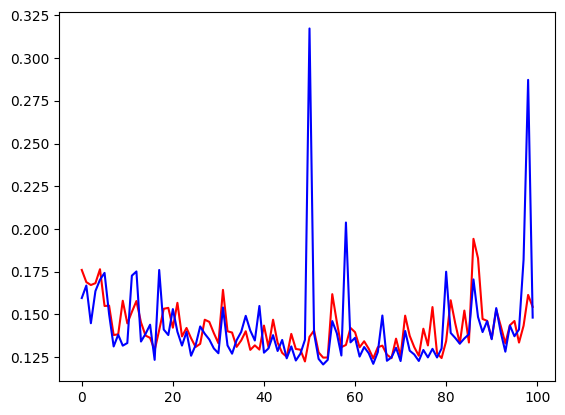

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],'b',label='loss')

In [ ]:
autoencoder.save_weights('autoencorders_noise_removal-1.h5')